In [228]:
import numpy as np 
import pandas as pd

In [229]:
# csv 파일로 변경된 데이터 값 불러오기

data = pd.read_csv('dataSets/mediapipe.csv')
column = data.columns
data= data.iloc[:,1:]

data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20
0,0.404542,0.529694,0.618953,0.571109,0.456159,0.488172,0.471621,0.500815,0.513571,0.392007,...,-0.295628,-0.184289,-0.152603,-0.370800,-0.295711,-0.200394,-0.199421,-0.310513,-0.301025,-0.270397
1,0.413549,0.550146,0.651645,0.737971,0.836858,0.512051,0.510382,0.528233,0.524869,0.414519,...,-0.207236,-0.103342,-0.085130,-0.277785,-0.211119,-0.119234,-0.125953,-0.225081,-0.205987,-0.169946
2,0.428701,0.548329,0.637850,0.704604,0.793237,0.504506,0.491109,0.479033,0.463658,0.414050,...,-0.174049,-0.119383,-0.055195,-0.233514,-0.188526,-0.127703,-0.099112,-0.213437,-0.188189,-0.153506
3,0.428534,0.562659,0.645841,0.694440,0.759962,0.534378,0.565480,0.578454,0.584854,0.440824,...,-0.072181,-0.113013,-0.024426,-0.137705,-0.149519,-0.129195,-0.076969,-0.175881,-0.193471,-0.189701
4,0.439059,0.581715,0.662364,0.692772,0.745169,0.521526,0.537720,0.543884,0.550133,0.420517,...,0.038850,0.036585,0.004781,-0.044463,-0.082956,-0.103803,-0.052091,-0.145507,-0.194990,-0.221053
5,0.447017,0.596309,0.679043,0.716606,0.780625,0.534685,0.558728,0.569463,0.577216,0.433638,...,0.148621,0.142368,0.075213,0.098014,0.095135,0.089083,0.034411,0.039586,0.025056,0.007471
6,0.514572,0.616747,0.714684,0.701367,0.608059,0.662555,0.667305,0.652828,0.654641,0.586794,...,-0.260746,-0.199339,-0.133702,-0.289219,-0.247438,-0.190969,-0.159178,-0.240119,-0.243733,-0.233799
7,0.434633,0.548404,0.647945,0.730778,0.814172,0.592030,0.584904,0.565193,0.560256,0.518701,...,-0.250368,-0.171096,-0.108478,-0.267078,-0.231009,-0.159867,-0.129585,-0.212345,-0.201338,-0.160215
8,0.447066,0.550976,0.646708,0.729267,0.815667,0.591320,0.585639,0.584468,0.580066,0.521831,...,-0.193186,-0.158614,-0.082631,-0.200177,-0.180467,-0.142757,-0.099417,-0.175042,-0.158597,-0.129840
9,0.464198,0.574634,0.674885,0.762433,0.849241,0.610422,0.638904,0.655171,0.664317,0.543433,...,-0.068412,-0.092832,-0.022918,-0.107633,-0.125738,-0.112601,-0.043194,-0.118710,-0.131411,-0.116928


In [230]:
x = data.iloc[13,0:21].T
y = data.iloc[13, 21:42].T
z = data.iloc[13,42:63].T

In [231]:
# 벡터로 변환

vector_columnList = [0,1,2,3,4,5,6,7,8,9,
                    10,11,12,13,14,15,16,17,18,19,
                    ]
vector_direction = [[0,1], [1,2], [2,3], [3,4], [0,5], [5,6], [6,7], [7,8], [0,9], [9,10],
                    [10,11], [11,12], [0,13], [13,14], [14,15], [15,16], [0,17], [17,18], [18,19], [19,20],
                    ]


vector_data = []
for c, v in zip(vector_columnList, vector_direction):
    df = pd.DataFrame([data['x'+str(v[1])]-data['x'+str(v[0])]], index=['x'])
    df.loc['y'] = data['y'+str(v[1])]-data['y'+str(v[0])]
    df.loc['z'] = data['z'+str(v[1])]-data['z'+str(v[0])]
    vector_data.append(df.T)


In [232]:
# 필요한 각도 계산

degree_list1 = [[0,3],[5,9],[9,13],[13,17]]
degree_list2 = [[1,2], [2,3], [4,5], [5,6], [6,7], [8,9], [9,10], [10,11], [12,13], [13,14],
                [14,15], [16,17], [17,18], [18,19]]

result = pd.DataFrame()

for d in degree_list1:
    a= vector_data[d[0]].x*vector_data[d[1]].x + vector_data[d[0]].y*vector_data[d[1]].y + vector_data[d[0]].z*vector_data[d[1]].z
    b=((vector_data[d[0]].x**2 + vector_data[d[0]].y**2 + vector_data[d[0]].z**2)**0.5)*((vector_data[d[1]].x**2 + vector_data[d[1]].y**2 + vector_data[d[1]].z**2)**0.5)
    result['vec'+str(d[0])+'-'+str(d[1])] = np.arccos(a/b)

for d in degree_list2:
    a= -vector_data[d[0]].x*vector_data[d[1]].x -vector_data[d[0]].y*vector_data[d[1]].y - vector_data[d[0]].z*vector_data[d[1]].z
    b=((vector_data[d[0]].x**2 + vector_data[d[0]].y**2 + vector_data[d[0]].z**2)**0.5)*((vector_data[d[1]].x**2 + vector_data[d[1]].y**2 + vector_data[d[1]].z**2)**0.5)
    result['vec'+str(d[0])+'-'+str(d[1])] = np.arccos(a/b)

result

,vec0-3,vec5-9,vec9-13,vec13-17,vec1-2,vec2-3,vec4-5,vec5-6,vec6-7,vec8-9,vec9-10,vec10-11,vec12-13,vec13-14,vec14-15,vec16-17,vec17-18,vec18-19
0,1.854203,0.171703,0.004186,0.270897,2.317518,2.222960,2.336070,0.445483,2.441761,2.308863,0.846548,2.038695,2.426828,0.722480,2.120985,2.607621,0.972316,1.934293
1,0.330621,0.309787,0.037807,0.286711,3.084557,2.689821,2.220365,0.449572,2.495765,2.052124,0.947444,1.898084,2.147317,0.838398,2.130209,2.257130,1.031468,2.103463
2,0.385071,0.597807,0.056536,0.176181,3.090751,2.657902,2.359340,3.085825,3.026464,1.923079,1.180311,2.058086,2.013395,0.973413,2.139261,2.184815,0.969017,2.063345
3,0.281036,0.432291,0.600136,0.074591,2.969803,2.683607,2.748200,2.974708,3.032054,2.659828,3.034693,3.122634,2.306661,1.045867,2.705103,2.438072,1.185414,2.792269
4,0.520177,0.355772,0.332076,0.592176,2.876002,2.744939,2.791861,2.978013,2.938152,2.874724,3.021630,3.017559,2.765176,3.006629,2.974266,2.255464,1.709045,2.814774
5,0.398800,0.267587,0.198263,0.455848,2.870136,2.667629,2.958451,3.006856,2.969340,3.094820,2.876120,2.979839,3.005593,2.813738,3.039000,3.079081,2.852981,3.018090
6,1.969217,0.174045,0.022377,0.182190,2.287466,2.059852,2.407603,0.517360,2.398431,2.406629,1.016852,1.948585,2.521682,0.820317,2.188635,2.647912,1.236494,2.330696
7,0.346613,0.193377,0.033076,0.133619,3.136041,2.857867,2.219400,0.936708,2.107768,2.251614,1.112323,1.733307,2.408288,0.925314,2.016576,2.592845,1.063026,1.985618
8,0.240181,0.626637,0.045979,0.172346,3.083623,2.923797,2.362355,3.107971,2.934139,2.118920,1.322955,2.198653,2.281989,1.054463,2.271162,2.502359,0.896554,2.348423
9,0.213790,0.259962,0.785782,0.084895,3.080753,2.927657,2.712183,2.997887,3.012163,2.709840,2.932649,3.082334,2.181784,1.315045,2.544071,2.326750,1.346259,2.517461


In [233]:
# val = (result>125).replace({True:1, False:0}) # 1: 핀거 0: 굽힌거
# val
# 각도에 따라 핀지 굽한지를 인식해 보았는데 이상적인 결과가 나오지 않아 방향을 바꿔보았다.

In [234]:
# 엄지 손까락을 굽혔을 경우

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

thumb_true=result[result['vec0-3']*180/np.pi>=90].iloc[:]

# 엄지 손가락, 손가락 마디 사이에 대한 가중치
thumb_true.iloc[:,0:4] *=2 

thumb_true

,vec0-3,vec5-9,vec9-13,vec13-17,vec1-2,vec2-3,vec4-5,vec5-6,vec6-7,vec8-9,vec9-10,vec10-11,vec12-13,vec13-14,vec14-15,vec16-17,vec17-18,vec18-19
0,3.708406,0.343406,0.008372,0.541794,2.317518,2.222960,2.336070,0.445483,2.441761,2.308863,0.846548,2.038695,2.426828,0.722480,2.120985,2.607621,0.972316,1.934293
6,3.938435,0.348089,0.044753,0.364379,2.287466,2.059852,2.407603,0.517360,2.398431,2.406629,1.016852,1.948585,2.521682,0.820317,2.188635,2.647912,1.236494,2.330696
13,4.679517,0.149964,0.156774,0.345521,1.891177,2.244132,2.782890,3.083092,2.961837,3.002116,2.889203,2.867311,3.001763,2.999069,2.877125,2.897691,2.886427,3.021136
14,3.785192,1.072087,0.389178,0.592858,2.282311,2.649823,2.628716,1.264883,2.873057,3.017729,3.030659,3.057513,2.964689,2.804954,2.984835,2.600466,1.216246,2.328802
15,3.957499,0.237463,0.093492,0.568442,2.336802,2.084081,2.312601,0.521390,2.439111,2.382598,0.930688,2.051893,2.461743,0.715616,2.241689,2.425321,1.095339,1.855149
16,4.295182,0.386165,0.200377,0.230255,2.274742,1.864941,2.699551,1.671146,2.471954,2.934119,1.250206,2.621651,3.078392,0.985928,2.686407,2.853293,1.589564,2.110998
18,5.232474,0.199528,0.269124,0.445008,1.836452,2.371780,2.835806,2.959817,2.876401,3.077661,2.961582,2.823280,2.869880,3.113671,2.837606,2.876566,2.934716,3.055955
19,4.114858,0.787162,0.254193,1.117959,1.936535,2.521356,2.602160,0.786175,2.767474,3.019753,2.937265,2.925491,3.027955,2.743360,3.047661,2.388845,1.121434,2.856732
20,4.272144,0.350195,0.165119,0.375682,2.017340,2.250469,2.537023,0.351847,2.560739,2.473640,0.811064,2.218393,2.447125,0.854174,2.186035,2.637523,1.319525,2.917576
21,4.869111,0.395397,0.044180,0.105150,1.963774,2.022165,2.628910,1.894257,2.450004,2.892209,1.473709,2.475370,3.029151,1.503754,2.356232,2.895444,1.981791,1.877818


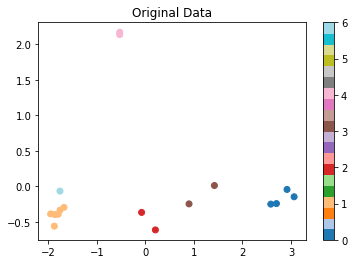

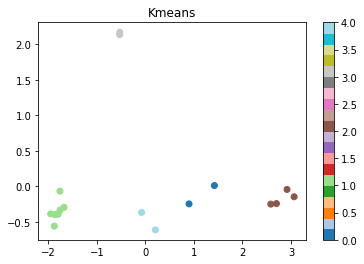

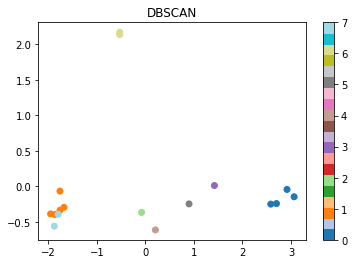

In [235]:
# 실제 데이터, kmeans, DBSCAN을 pca로 plot

pca = PCA(n_components=2)
val = pca.fit_transform(thumb_true)
df = pd.DataFrame(val, columns=['x','y'])

plt.title('Original Data')
label = [0, 0, 1,2, 0,3,1,2,0,3,4,4,1,6,1,1,1]
plt.scatter(df.x, df.y, c= label, cmap='tab20')
plt.colorbar()
plt.show()

kmeans = KMeans(init='k-means++',n_clusters=5)
predict = kmeans.fit_predict(thumb_true)
plt.title('Kmeans')
plt.scatter(df.x, df.y, c= predict, cmap='tab20')
plt.colorbar()
plt.show()

dbscan = DBSCAN(min_samples=1, eps=1)
predict2 = dbscan.fit_predict(thumb_true)
plt.title('DBSCAN')
plt.scatter(df.x, df.y, c= predict2, cmap='tab20')
plt.colorbar()
plt.show()

In [236]:
# 점과 점사이 유사도 계산 알고리즘

def fit_predict(df, limit=1.5):
    distance = pd.DataFrame(columns=['x','y', 'value'])
    predict = pd.Series(data=[0 for x in range(0,len(df),1)], index=df.index)
    count=1
    for i in range(0,len(df.index),1):
        for j in range(i+1,len(df.index),1):
            row1=np.array(df.iloc[i,:])
            row2=np.array(df.iloc[j,:])
            distance=distance.append({'x': df.index[i], 'y': df.index[j],'value':((row1-row2)**2).sum()}, ignore_index=True)
    
    distance=distance[distance.value<limit] # 거리 제한

    for k in distance.itertuples():
        try:
            x = distance.loc[distance.value.idxmin()]
            predict[int(x.x)]=count
            predict[int(x.y)]=count
            count += 1
            distance = distance[distance['x'] != x.x]
            distance = distance[distance['x'] != x.y]
            distance = distance[distance['y'] != x.x]
            distance = distance[distance['y'] != x.y]
        except:
            break
    return predict
    

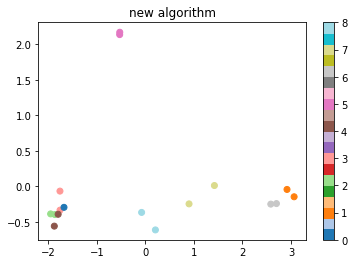

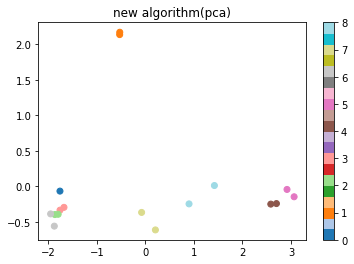

    original  pca
0          1    5
6          6    4
13         2    2
14         8    7
15         1    5
16         7    8
18         2    6
19         8    7
20         6    4
21         7    8
22         5    1
26         5    1
30         3    3
31         3    0
33         0    3
34         4    2
37         4    6


In [237]:
# 원본 데이터를 이용했을 때 군집 형성

predict3=fit_predict(thumb_true)
plt.title('new algorithm')
plt.scatter(df.x, df.y, c= predict3, cmap='tab20')
plt.colorbar()
plt.show()

#pca 데이터를 이용했을 때 군집 형성

predict4=fit_predict(df,1)
plt.title('new algorithm(pca)')
plt.scatter(df.x, df.y, c= predict4, cmap='tab20')
plt.colorbar()
plt.show()

predict4.index = list(predict3.index)
v= pd.DataFrame([predict3, predict4],index=['original', 'pca'])
print(v.T)

#거리를 1로 제한할때, 1.5로제한할때 각각 비교해볼것 (1일때는 어떤점은 outlier 처리됨)

In [243]:
thumb_false=result[result['vec0-3']*180/np.pi<90].iloc[:]

# 엄지 손가락, 손가락 마디 사이에 대한 가중치
thumb_false.iloc[:,0:4] *=2

thumb_false

,vec0-3,vec5-9,vec9-13,vec13-17,vec1-2,vec2-3,vec4-5,vec5-6,vec6-7,vec8-9,vec9-10,vec10-11,vec12-13,vec13-14,vec14-15,vec16-17,vec17-18,vec18-19
1,0.661242,0.619574,0.075614,0.573422,3.084557,2.689821,2.220365,0.449572,2.495765,2.052124,0.947444,1.898084,2.147317,0.838398,2.130209,2.257130,1.031468,2.103463
2,0.770143,1.195614,0.113073,0.352362,3.090751,2.657902,2.359340,3.085825,3.026464,1.923079,1.180311,2.058086,2.013395,0.973413,2.139261,2.184815,0.969017,2.063345
3,0.562072,0.864582,1.200273,0.149182,2.969803,2.683607,2.748200,2.974708,3.032054,2.659828,3.034693,3.122634,2.306661,1.045867,2.705103,2.438072,1.185414,2.792269
4,1.040354,0.711543,0.664152,1.184352,2.876002,2.744939,2.791861,2.978013,2.938152,2.874724,3.021630,3.017559,2.765176,3.006629,2.974266,2.255464,1.709045,2.814774
5,0.797600,0.535173,0.396525,0.911696,2.870136,2.667629,2.958451,3.006856,2.969340,3.094820,2.876120,2.979839,3.005593,2.813738,3.039000,3.079081,2.852981,3.018090
7,0.693225,0.386755,0.066153,0.267237,3.136041,2.857867,2.219400,0.936708,2.107768,2.251614,1.112323,1.733307,2.408288,0.925314,2.016576,2.592845,1.063026,1.985618
8,0.480361,1.253273,0.091959,0.344692,3.083623,2.923797,2.362355,3.107971,2.934139,2.118920,1.322955,2.198653,2.281989,1.054463,2.271162,2.502359,0.896554,2.348423
9,0.427580,0.519923,1.571563,0.169790,3.080753,2.927657,2.712183,2.997887,3.012163,2.709840,2.932649,3.082334,2.181784,1.315045,2.544071,2.326750,1.346259,2.517461
10,0.583036,0.337812,0.673548,1.039555,3.082952,2.914652,2.556277,2.941594,3.010174,2.786629,2.946963,3.053332,2.791236,3.070962,2.976196,2.537514,1.729118,2.495879
11,0.249344,0.355343,0.431899,0.713800,3.124689,2.871233,2.832207,2.908517,3.067244,2.983611,2.864002,3.090027,3.104519,2.839685,3.084475,3.018329,3.018204,3.044201


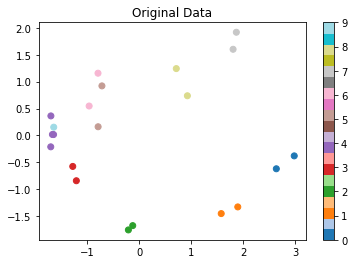

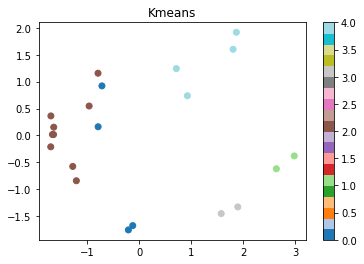

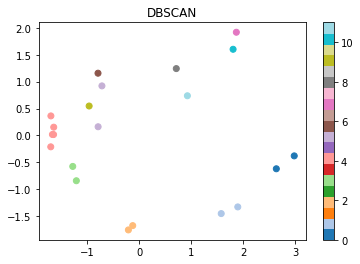

In [241]:
# 실제 데이터, kmeans, DBSCAN을 pca로 plot

pca = PCA(n_components=2)
val = pca.fit_transform(thumb_false)
df = pd.DataFrame(val, columns=['x','y'])

plt.title('Original Data')
label = [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 6, 7, 8, 9, 4, 4]
plt.scatter(df.x, df.y, c= label, cmap='tab20')
plt.colorbar()
plt.show()

kmeans = KMeans(init='k-means++',n_clusters=5)
predict = kmeans.fit_predict(thumb_false)
plt.title('Kmeans')
plt.scatter(df.x, df.y, c= predict, cmap='tab20')
plt.colorbar()
plt.show()

dbscan = DBSCAN(min_samples=1, eps=1)
predict2 = dbscan.fit_predict(thumb_false)
plt.title('DBSCAN')
plt.scatter(df.x, df.y, c= predict2, cmap='tab20')
plt.colorbar()
plt.show()


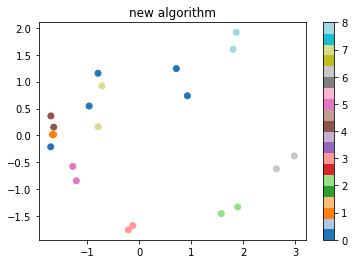

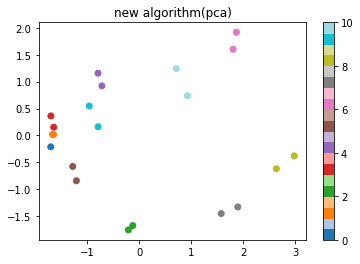

    original  pca
1          6    8
2          2    7
3          3    2
4          5    5
5          1    1
7          6    8
8          2    7
9          3    2
10         5    5
11         0    0
12         7    9
17         7    4
23         0    4
24         8    6
25         0   10
27         0    9
28         8    6
29         0   10
32         4    3
35         4    3
36         1    1


In [242]:
# 원본 데이터를 이용했을 때 군집 형성

predict3=fit_predict(thumb_false)
plt.title('new algorithm')
plt.scatter(df.x, df.y, c= predict3, cmap='tab20')
plt.colorbar()
plt.show()

#pca 데이터를 이용했을 때 군집 형성

predict4=fit_predict(df,1)
plt.title('new algorithm(pca)')
plt.scatter(df.x, df.y, c= predict4, cmap='tab20')
plt.colorbar()
plt.show()

predict4.index = list(predict3.index)
v= pd.DataFrame([predict3, predict4],index=['original', 'pca'])
print(v.T)

#거리를 1로 제한할때, 1.5로제한할때 각각 비교해볼것 (1일때는 어떤점은 outlier 처리됨)